### Importing Libraries and Loading Data Sets

In [4]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Loading data sets
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv')
imdb_basics = pd.read_csv('zippedData\imdb.title.basics.csv')
imdb_ratings = pd.read_csv('zippedData\imdb.title.ratings.csv')

## Understanding the nature of data

In [6]:
bom_df.info()
imdb_basics.info()
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1),

In [7]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Merging of Data sets to make it easier and faster to analyze data 

In [10]:
#Merging of data sets commont column name tconst
basics_and_ratings_df = pd.merge(imdb_basics,imdb_ratings, on = 'tconst')
basics_and_ratings_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [11]:
#Merging all the data sets
basics_ratings_bom_df = pd.merge(basics_and_ratings_df, bom_df, suffixes = ['_l', '_r'],left_on ='original_title',right_on = 'title')
basics_ratings_bom_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000,2018
2443,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,NaN,2018
2444,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
2445,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,Oolong Courtyard,CL,37700.0,NaN,2018


In [12]:
#Getting the general info of data after merging the data sets
basics_ratings_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2447 non-null   object 
 1   primary_title    2447 non-null   object 
 2   original_title   2447 non-null   object 
 3   start_year       2447 non-null   int64  
 4   runtime_minutes  2402 non-null   float64
 5   genres           2443 non-null   object 
 6   averagerating    2447 non-null   float64
 7   numvotes         2447 non-null   int64  
 8   title            2447 non-null   object 
 9   studio           2444 non-null   object 
 10  domestic_gross   2429 non-null   float64
 11  foreign_gross    1573 non-null   object 
 12  year             2447 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 267.6+ KB


In [13]:
#Checking for dupplicated data
basics_ratings_bom_df.duplicated().value_counts()

False    2447
dtype: int64

In [14]:
basics_ratings_bom_df.shape

(2447, 13)

## Cleaning of Data 

In [15]:
#Identifying missing values
basics_ratings_bom_df.isnull().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes     45
genres               4
averagerating        0
numvotes             0
title                0
studio               3
domestic_gross      18
foreign_gross      874
year                 0
dtype: int64

In [16]:
#Dealing with the missing value
#Checking for the percentage of missing values in the data set
percentage_missing = basics_ratings_bom_df.isnull().sum()*100/len(basics_ratings_bom_df)
percentage_missing 

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes     1.838987
genres              0.163465
averagerating       0.000000
numvotes            0.000000
title               0.000000
studio              0.122599
domestic_gross      0.735595
foreign_gross      35.717205
year                0.000000
dtype: float64

In [17]:
#Drop foreign_gross since it has the highest percentage of missing data at 35%
basics_ratings_bom_df = basics_ratings_bom_df.drop('foreign_gross', axis= 1) 

In [18]:
basics_ratings_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2447 non-null   object 
 1   primary_title    2447 non-null   object 
 2   original_title   2447 non-null   object 
 3   start_year       2447 non-null   int64  
 4   runtime_minutes  2402 non-null   float64
 5   genres           2443 non-null   object 
 6   averagerating    2447 non-null   float64
 7   numvotes         2447 non-null   int64  
 8   title            2447 non-null   object 
 9   studio           2444 non-null   object 
 10  domestic_gross   2429 non-null   float64
 11  year             2447 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 248.5+ KB


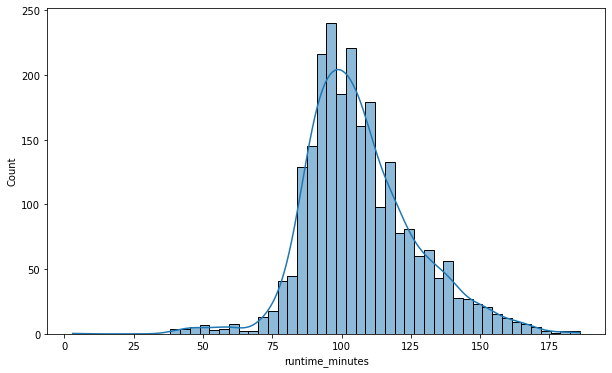

In [19]:
#checking for outliers in our runtime_minutes since the percentage is slightly low at 1.8%
#create a histogram
fig, ax = plt.subplots(figsize =(10,6))
sns.histplot(basics_ratings_bom_df.runtime_minutes, kde=True)
plt.show()

In [20]:
#Replacing the missing values in runtime_minutes with the mean of the column since we only have a few outliers
basics_ratings_bom_df ['runtime_minutes']= basics_ratings_bom_df.runtime_minutes.fillna(basics_ratings_bom_df.runtime_minutes.mean())

In [21]:
#Drop the rest of the missing values from our data set
basics_ratings_bom_df.dropna(axis=0, inplace = True)

In [22]:
#Confirming that all the missing values have been dropped
basics_ratings_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 0 to 2446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2424 non-null   object 
 1   primary_title    2424 non-null   object 
 2   original_title   2424 non-null   object 
 3   start_year       2424 non-null   int64  
 4   runtime_minutes  2424 non-null   float64
 5   genres           2424 non-null   object 
 6   averagerating    2424 non-null   float64
 7   numvotes         2424 non-null   int64  
 8   title            2424 non-null   object 
 9   studio           2424 non-null   object 
 10  domestic_gross   2424 non-null   float64
 11  year             2424 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 246.2+ KB


In [23]:
#Final outlook of the dataframe.
basics_ratings_bom_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,2424.000000,2424.000000,2424.000000,2.424000e+03,2.424000e+03,2424.000000
mean,2013.783003,106.889792,6.408581,7.334540e+04,3.611537e+07,2014.012376
std,2.492569,19.847927,1.042490,1.350694e+05,6.957061e+07,2.462398
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.800000,3.919000e+03,3.020000e+05,2012.000000
50%,2014.000000,104.000000,6.500000,2.121800e+04,5.050000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,8.138900e+04,4.292500e+07,2016.000000
max,2019.000000,186.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [24]:
basics_ratings_bom_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

## Grouping data in the average rating column

In [25]:
#define a function that groups the averagerating column
def rating(averagerating):
    if averagerating >= 8:
        return "Excellent"
    elif averagerating >= 6:
        return "Good"
    elif averagerating >= 4:
        return "Average"
    else:
        return "Below Average"

In [26]:
#Creating column for the grouped data
basics_ratings_bom_df['Rating'] = basics_ratings_bom_df['averagerating'].apply(rating)

In [27]:
basics_ratings_bom_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,Rating
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,2016,Good
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012,Good
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,2012,Good
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,2012,Average
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,2013,Good


In [28]:
# Finding unique values to help to preserve the type of the dataframe object  and remove the rows with duplicate values
genre_1 = []
for item in basics_ratings_bom_df['genres']:
    genre_1.append(item.split(','))
genre_1
genre_2 = []
for item in genre_1:
    for item1 in item:
        genre_2.append(item1)
genre_2
unique_genre=[]
for item in genre_2:
    if item not in unique_genre:
        unique_genre.append(item)
print(unique_genre)
len(unique_genre)

['Action', 'Crime', 'Drama', 'Adventure', 'Romance', 'Comedy', 'Sci-Fi', 'Family', 'Animation', 'Thriller', 'Mystery', 'Biography', 'History', 'Horror', 'Documentary', 'News', 'Fantasy', 'Sport', 'Music', 'War', 'Western', 'Musical']


22

In [29]:
#make a copy of the DataFrame so that any changes made in the original DataFrame will NOT be reflected in the copy.
final_movie_df = basics_ratings_bom_df.copy()
basics_ratings_bom_df['genres']= basics_ratings_bom_df['genres'].str.split(',')
final_movie_df = basics_ratings_bom_df.explode('genres')

In [30]:
final_movie_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,Rating
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,2016,Good
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,2016,Good
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,2016,Good


In [31]:
final_movie_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,Rating
2443,tt8108198,Andhadhun,Andhadhun,2018,139.0,Thriller,8.5,43409,Andhadhun,Eros,1200000.0,2018,Excellent
2444,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,2018,Average
2445,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,Oolong Courtyard,CL,37700.0,2018,Average
2446,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,2018,Excellent
2446,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Music,8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,2018,Excellent


## Visual display of information to help answer our findings

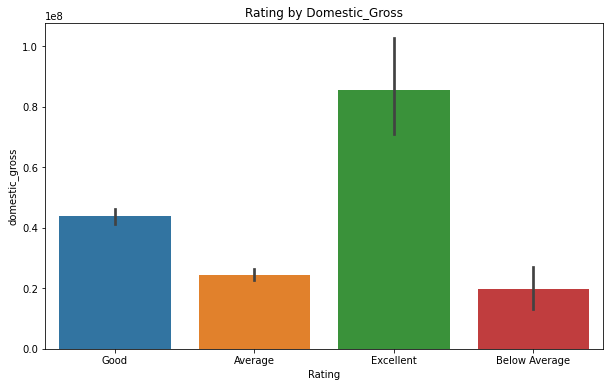

In [32]:
#Effects of the rating on revenue
final_movie_df.groupby('Rating')['domestic_gross'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y= "domestic_gross", data = final_movie_df)
plt.title('Rating by Domestic_Gross')
plt.show()

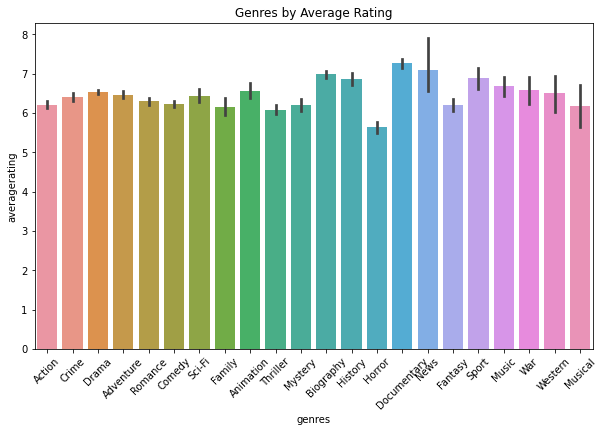

In [33]:
#Genres with the highest ratings
final_movie_df.groupby('genres')['averagerating'].mean().sort_values(ascending = True)
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y= "averagerating", data = final_movie_df)
plt.xticks(rotation = 45)
plt.title('Genres by Average Rating')
plt.show()

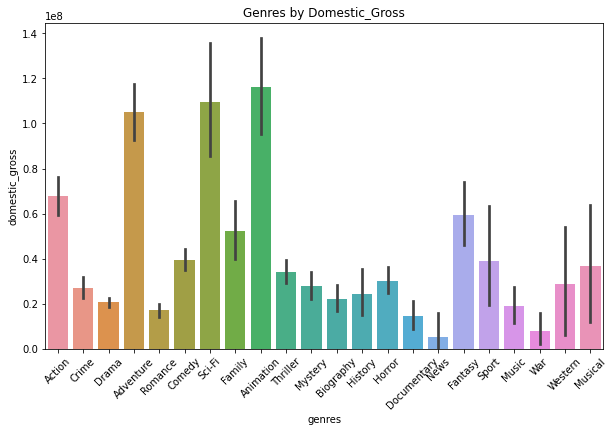

In [34]:
#Genres have the highest Domestic Gross
final_movie_df.groupby('genres')['domestic_gross'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y= "domestic_gross", data=final_movie_df)
plt.xticks(rotation=45)
plt.title('Genres by Domestic_Gross')
plt.show()